In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1]:
df = pd.read_csv("E:\PROGRAMMING\Diabetes Prediction using ML\supplement.csv")
df

NameError: name 'pd' is not defined

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


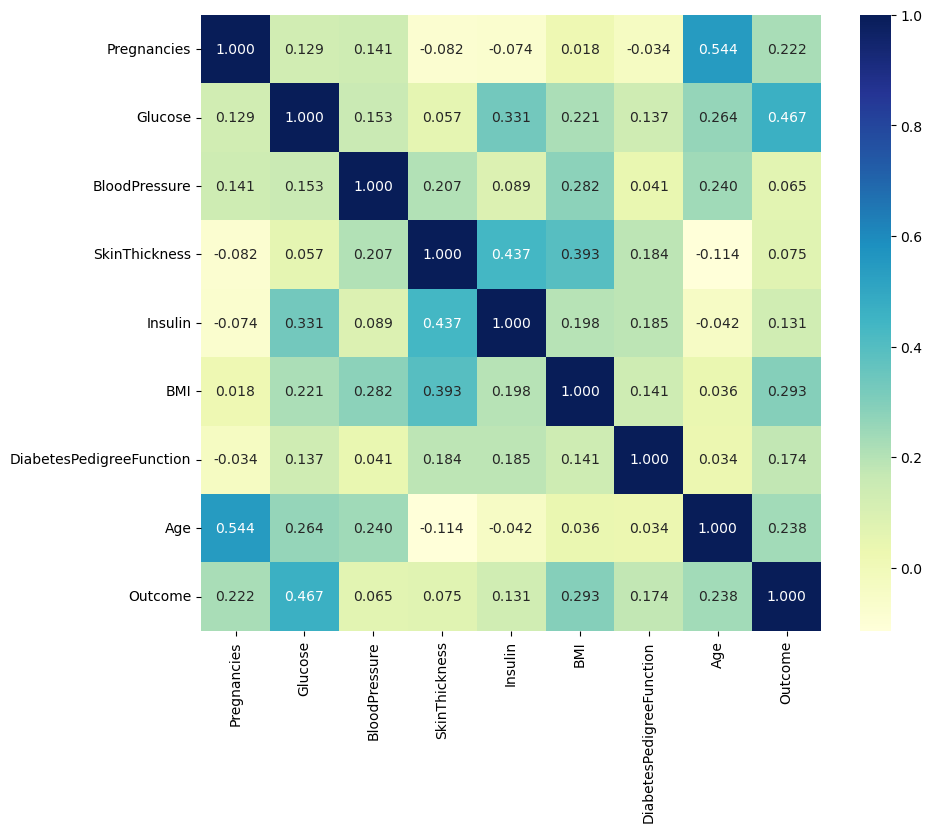

In [5]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True , fmt = ".3f" , cmap = "YlGnBu")
plt.title = ("Correlation Heatmap")

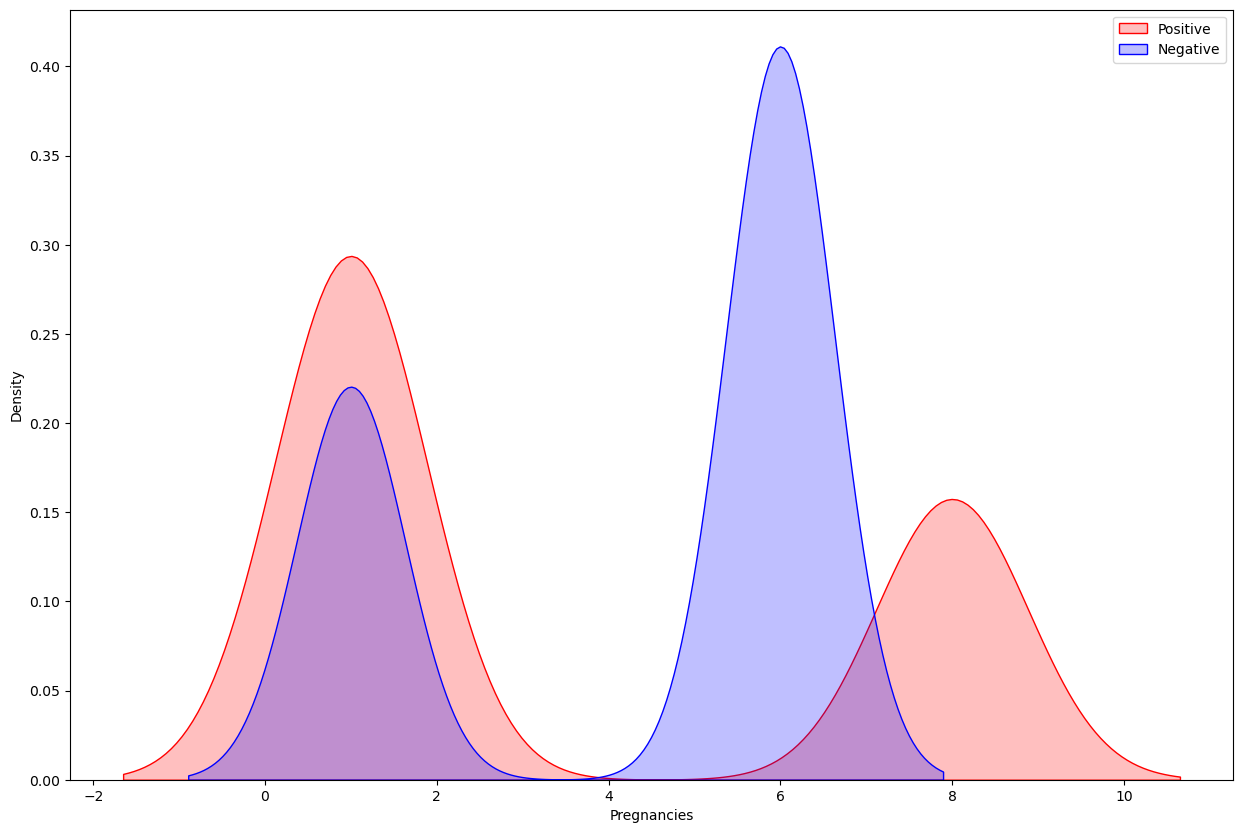

In [6]:
plt.figure(figsize = (15,10))
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"]--1], color = "Red", fill = True)
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"]--0], color = "Blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

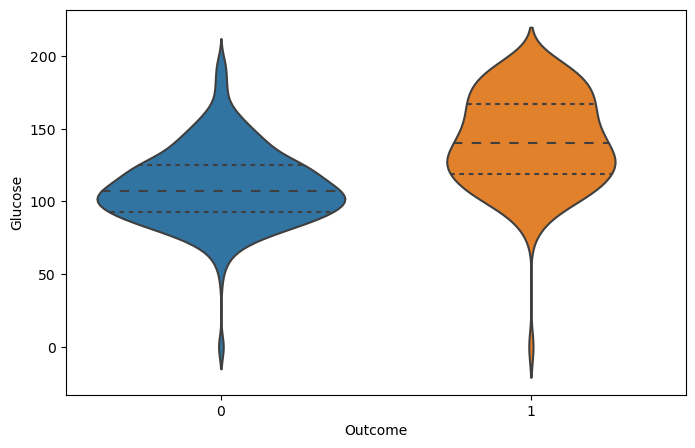

In [7]:
plt.figure(figsize = (8,5))
sns.violinplot(data = df, x = "Outcome", y = "Glucose", split = True, inner = "quart")

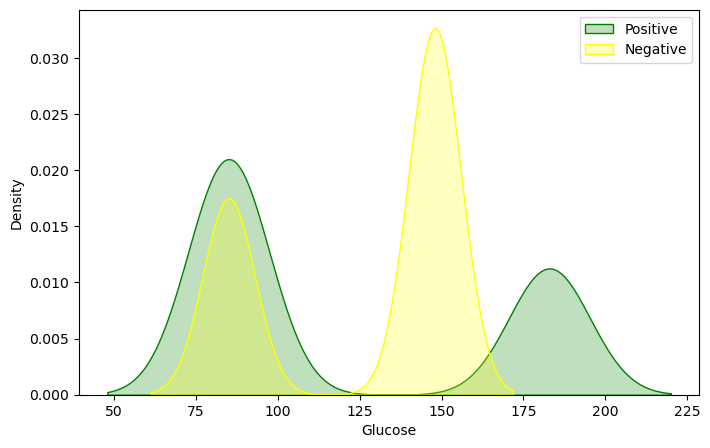

In [8]:
plt.figure(figsize = (8,5))
kde = sns.kdeplot(df["Glucose"][df["Outcome"]--1], color = "Green", fill = True)
kde = sns.kdeplot(df["Glucose"][df["Outcome"]--0], color = "Yellow", fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

In [9]:
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].median())
df["BMI"] = df["BMI"].replace(0, df["BMI"].median())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].median())

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,30.5,33.6,0.627,50,1
1,1,85,66,29.000000,30.5,26.6,0.351,31,0
2,8,183,64,20.536458,30.5,23.3,0.672,32,1
3,1,89,66,23.000000,94.0,28.1,0.167,21,0
4,0,137,40,35.000000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.0,32.9,0.171,63,0
764,2,122,70,27.000000,30.5,36.8,0.340,27,0
765,5,121,72,23.000000,112.0,26.2,0.245,30,0
766,1,126,60,20.536458,30.5,30.1,0.349,47,1


In [11]:
X = df.drop(["Outcome"], axis = 1)
Y = df["Outcome"]

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,30.5,33.6,0.627,50
1,1,85,66,29.000000,30.5,26.6,0.351,31
2,8,183,64,20.536458,30.5,23.3,0.672,32
3,1,89,66,23.000000,94.0,28.1,0.167,21
4,0,137,40,35.000000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.0,32.9,0.171,63
764,2,122,70,27.000000,30.5,36.8,0.340,27
765,5,121,72,23.000000,112.0,26.2,0.245,30
766,1,126,60,20.536458,30.5,30.1,0.349,47


In [13]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .35 , random_state =40) 

In [15]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
168,4,110,66,20.536458,30.5,31.9,0.471,29
608,0,152,82,39.000000,272.0,41.5,0.270,27
151,4,114,65,20.536458,30.5,21.9,0.432,37
515,3,163,70,18.000000,105.0,31.6,0.268,28
533,6,91,72,20.536458,30.5,29.8,0.501,31
...,...,...,...,...,...,...,...,...
440,0,189,104,25.000000,30.5,34.3,0.435,41
165,6,104,74,18.000000,156.0,29.9,0.722,41
7,10,115,72,20.536458,30.5,35.3,0.134,29
219,5,112,66,20.536458,30.5,37.8,0.261,41


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train , Y_train)
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

<function matplotlib.pyplot.legend(*args, **kwargs)>

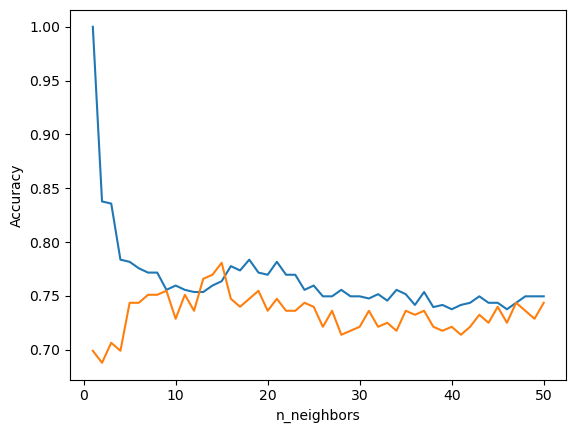

In [18]:
plt.plot(range(1,51), training_accuracy, label="training_accuracy")
plt.plot(range(1,51), test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend

In [19]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , Y_train)
print("Training Accuracy: ", knn.score(X_train, Y_train))
print("Test Accuracy: ", knn.score(X_test, Y_test))

Training Accuracy:  0.781563126252505
Test Accuracy:  0.7434944237918215


In [20]:
print(len(training_accuracy))
print(len(test_accuracy))


50
50


In [21]:
"""import matplotlib.pyplot as plt

plt.scatter(range(1, 11), training_accuracy, label="training_accuracy")
plt.scatter(range(1, 11), test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
"""

'import matplotlib.pyplot as plt\n\nplt.scatter(range(1, 11), training_accuracy, label="training_accuracy")\nplt.scatter(range(1, 11), test_accuracy, label="test_accuracy")\nplt.ylabel("Accuracy")\nplt.xlabel("n_neighbors")\nplt.legend()\nplt.show()\n'

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 78)
dt.fit(X_train , Y_train)
print("Training Accuracy: ", dt.score(X_train, Y_train))
print("Test Accuracy: ", dt.score(X_test, Y_test))

Training Accuracy:  1.0
Test Accuracy:  0.7063197026022305


In [23]:
dt1 = DecisionTreeClassifier(random_state = 8, max_depth = 6)
dt1.fit(X_train , Y_train)
print("Training Accuracy: ", dt1.score(X_train, Y_train))
print("Test Accuracy: ", dt1.score(X_test, Y_test))

Training Accuracy:  0.8697394789579158
Test Accuracy:  0.7509293680297398


In [24]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 56)
mlp.fit(X_train , Y_train)
print("Training Accuracy: ", mlp.score(X_train, Y_train))
print("Test Accuracy: ", mlp.score(X_test, Y_test))

Training Accuracy:  0.7635270541082164
Test Accuracy:  0.7323420074349443


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
mlp1 = MLPClassifier(random_state = 3)
mlp1.fit(X_train , Y_train)
print("Training Accuracy: ", mlp1.score(X_train, Y_train))
print("Test Accuracy: ", mlp1.score(X_test, Y_test))

Training Accuracy:  0.7535070140280561
Test Accuracy:  0.7211895910780669
